In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\abhid\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Frequent Category/ Mode Imputation

## Housing prices dataset

In [2]:
cols_to_use = ["BsmtQual", "FireplaceQu", "SalePrice"]

housing = pd.read_csv('../../datasets/housing_prices.csv',usecols=cols_to_use)
print(housing.shape)
housing.head()

(1460, 3)


,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [3]:
# checking percentage of nulls
housing.isnull().mean()*100

BsmtQual        2.534247
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

1) Imputation of FireplaceQu feature will not be a good idea as too high.   
Better to add Missing Indicaator for such column.  
2) BsmtQual Feature can be imputed as percent<5%.  

## Train and Test Creation

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing,
                                                   housing['SalePrice'],
                                                   test_size = 0.3,
                                                   random_state= 28)

(X_train.shape,y_train.shape), (X_test.shape,y_test.shape)

(((1022, 3), (1022,)), ((438, 3), (438,)))

<Axes: xlabel='BsmtQual'>

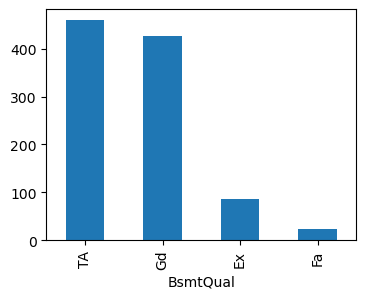

In [5]:
# barchart of frequency of each label
plt.figure(figsize = (4,3))
X_train['BsmtQual'].value_counts().plot(kind = 'bar')

In [6]:
# mode
mode = X_train['BsmtQual'].mode().iloc[0]
print(mode)

TA


### Effect of Category of Price distribution

<Axes: xlabel='SalePrice', ylabel='Density'>

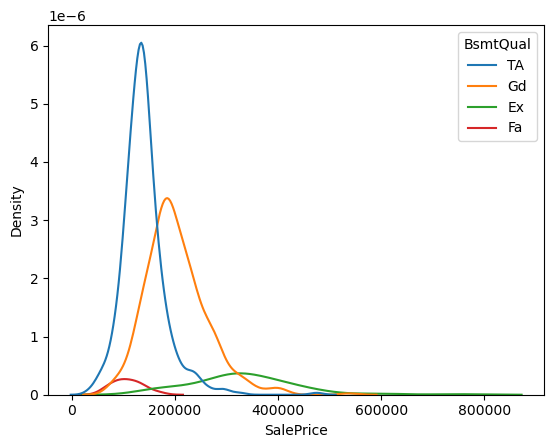

In [12]:
sns.kdeplot(data = X_train,x = 'SalePrice',hue = 'BsmtQual' )

So TA category has lower salesPrice than the others.

In [14]:
# imputing with mode category
X_train['BsmtQual_mode'] = X_train['BsmtQual'].fillna(mode)

X_train.sample(3)

,BsmtQual,FireplaceQu,SalePrice,BsmtQual_mode
669,Fa,Gd,137500,Fa
105,Ex,Gd,250000,Ex
1301,TA,Gd,177500,TA


## Imputing FireplaceQu Variable (47% missing)

In [15]:
X_train['FireplaceQu_mode'] = X_train['FireplaceQu'].fillna(X_train['FireplaceQu'].mode().iloc[0])

In [17]:
X_train.sample(5)

,BsmtQual,FireplaceQu,SalePrice,BsmtQual_mode,FireplaceQu_mode
511,Gd,Gd,202665,Gd,Gd
729,TA,NaN,103000,TA,Gd
567,Gd,NaN,214000,Gd,Gd
1125,TA,TA,115000,TA,TA
116,TA,Po,139000,TA,Po


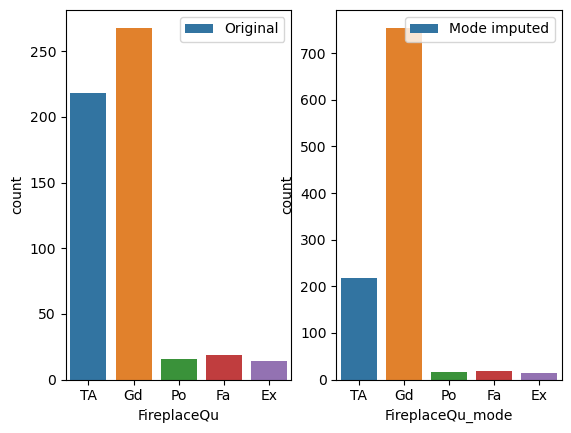

In [27]:
plt.subplot(1,2,1)
sns.countplot(data = X_train,x = 'FireplaceQu',label = 'Original')
plt.legend()

plt.subplot(1,2,2)
sns.countplot(data = X_train,x = 'FireplaceQu_mode',label = 'Mode imputed')
plt.legend()


## Effect of distribution of Target feature due to Imputation

In [35]:
X_train.head(3)

,BsmtQual,FireplaceQu,SalePrice,BsmtQual_mode,FireplaceQu_mode
757,TA,TA,158900,TA,TA
883,TA,NaN,118500,TA,Gd
353,TA,NaN,105900,TA,Gd


## Missing Category Imputation

In [6]:
X_train.sample(2)

,BsmtQual,FireplaceQu,SalePrice
823,TA,Gd,139500
723,TA,NaN,135000


In [7]:
X_train['BsmtQual_missing'] = X_train['BsmtQual'].fillna('Missing')
X_train['FireplaceQu_missing'] = X_train['FireplaceQu'].fillna('Missing')

In [10]:
X_train.sample(5)

,BsmtQual,FireplaceQu,SalePrice,BsmtQual_missing,FireplaceQu_missing
831,Gd,NaN,151000,Gd,Missing
228,TA,Fa,125000,TA,Fa
1326,TA,NaN,79000,TA,Missing
1425,TA,NaN,142000,TA,Missing
342,NaN,NaN,87500,Missing,Missing


In [11]:
X_train.isnull().mean()*100

BsmtQual                2.544031
FireplaceQu            47.651663
SalePrice               0.000000
BsmtQual_missing        0.000000
FireplaceQu_missing     0.000000
dtype: float64

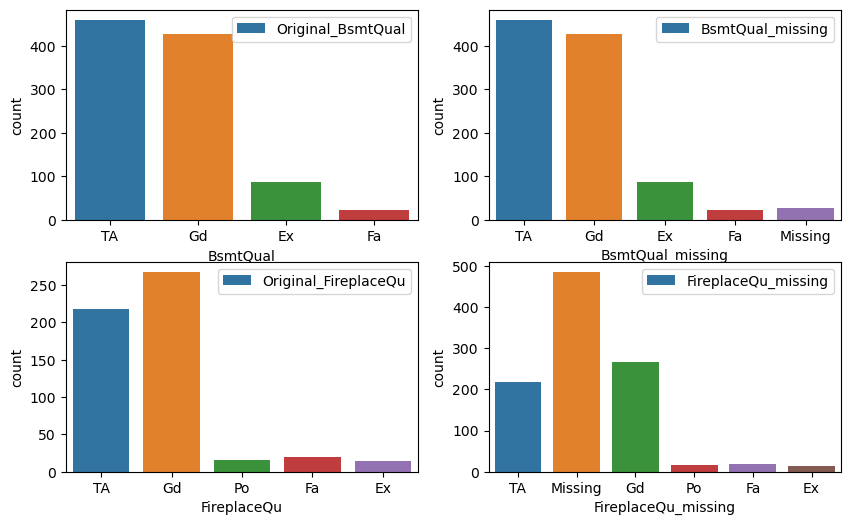

In [27]:
fig,ax = plt.subplots(2,2,figsize = (10,6))

sns.countplot(data = X_train,x = 'BsmtQual',ax = ax[0][0],label = 'Original_BsmtQual')
ax[0][0].legend()
sns.countplot(data = X_train,x = 'BsmtQual_missing',ax = ax[0][1], label = 'BsmtQual_missing')
ax[0][1].legend()

sns.countplot(data = X_train,x = 'FireplaceQu',ax = ax[1][0],label = 'Original_FireplaceQu')
ax[1][0].legend()
sns.countplot(data = X_train,x = 'FireplaceQu_missing',ax = ax[1][1], label = 'FireplaceQu_missing')
ax[1][1].legend()


### Distribution of SalePrice in each label

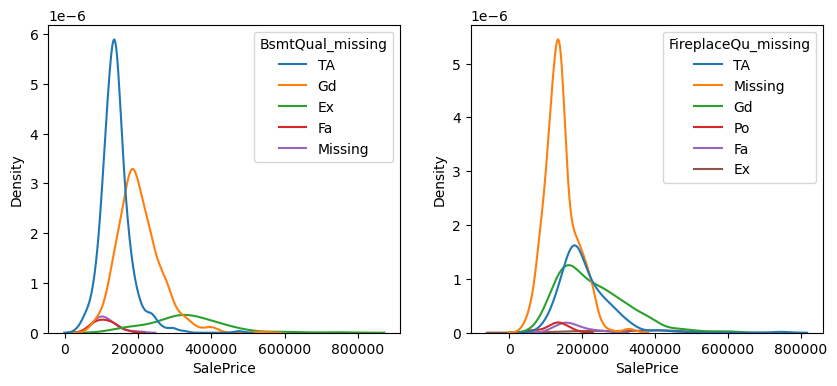

In [30]:
fig,ax = plt.subplots(1,2,figsize = (12,4))

for i,col in enumerate(['BsmtQual_missing','FireplaceQu_missing']):
    sns.kdeplot(data = X_train, x ='SalePrice', hue = col,ax = ax[i])